In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

## Lecture 9 ##

## Prediction ##

In [3]:
families = Table.read_table('family_heights.csv')
families

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female
2,75.5,66.5,73.5,4,1,male
2,75.5,66.5,72.5,4,2,male
2,75.5,66.5,65.5,4,3,female
2,75.5,66.5,65.5,4,4,female
3,75,64,71,2,1,male
3,75,64,68,2,2,female


In [4]:
parent_avgs = (families.column('father') + families.column('mother'))/2

In [5]:
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
    'Sex', families.column('sex')
)
heights

Parent Average,Child,Sex
72.75,73.2,male
72.75,69.2,female
72.75,69,female
72.75,69,female
71,73.5,male
71,72.5,male
71,65.5,female
71,65.5,female
69.5,71,male
69.5,68,female


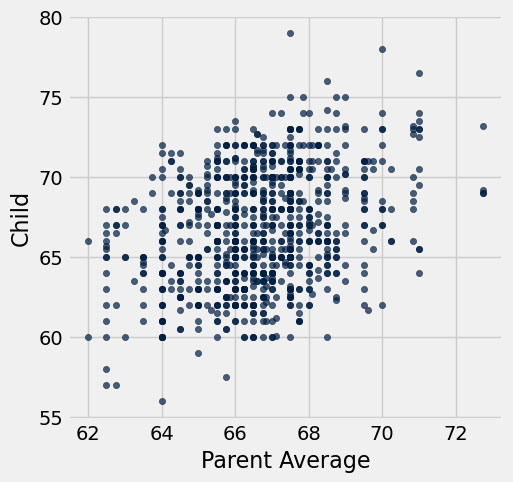

In [6]:
heights.scatter('Parent Average', 'Child')

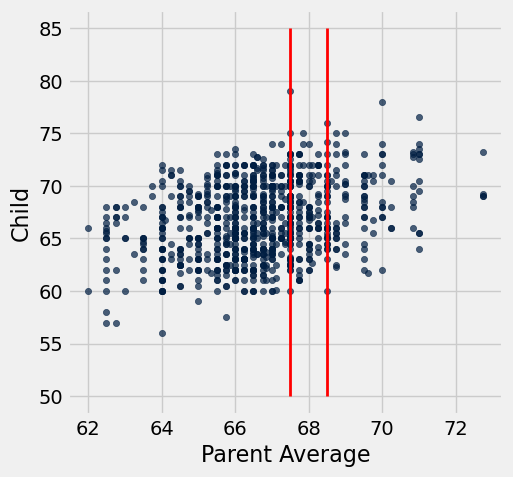

In [7]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [8]:
nearby = heights.where("Parent Average", are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column("Child"))
nearby_mean

67.62

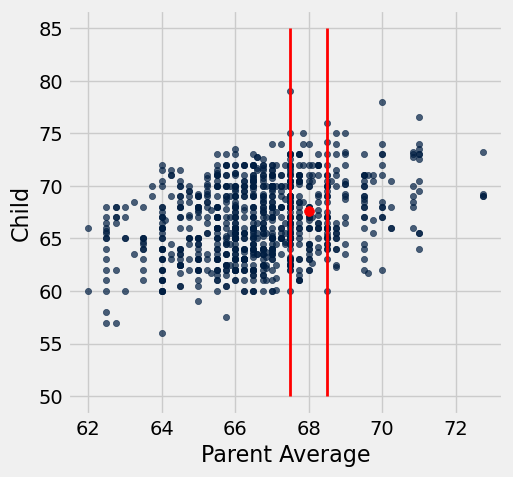

In [9]:
heights.scatter('Parent Average', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [10]:
def predict(h):
    nearby = heights.where("Parent Average", are.between(h - 0.05, h + 0.05))
    return np.average(nearby.column("Child"))

In [11]:
predict(68)

66.69285714285715

In [12]:
predict(64)

64.34615384615384

In [13]:
predict(71)

70.68181818181819

In [14]:
# Apply predict function to all average parent heights
predicted_heights = heights.apply(predict, "Parent Average")
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.68181818,
       70.68181818, 70.68181818, 70.68181818, 68.06      , 68.06      ,
       68.06      , 68.06      , 68.06      , 68.06      , 68.06      ,
       66.484     , 66.484     , 66.484     , 66.484     , 66.484     ,
       66.484     , 70.68181818, 70.68181818, 70.68181818, 70.68181818,
       70.68181818, 70.68181818, 70.68181818, 67.625     , 67.625     ,
       67.625     , 67.625     , 68.425     , 66.69285714, 66.69285714,
       66.69285714, 66.69285714, 66.69285714, 66.69285714, 66.69285714,
       66.69285714, 67.49894737, 70.125     , 70.125     , 70.125     ,
       70.125     , 68.425     , 68.425     , 68.425     , 69.46428571,
       69.46428571, 69.46428571, 69.46428571, 69.46428571, 69.46428571,
       69.46428571, 69.46428571, 69.46428571, 67.45882353, 67.45882353,
       67.45882353, 67.45882353, 67.45882353, 67.45882353, 67.58285714,
       67.58285714, 67.58285714, 68.64      , 70.05      , 70.05

In [15]:
# Create new column with predictions
heights = heights.with_column("Prediction", predicted_heights)
heights

Parent Average,Child,Sex,Prediction
72.75,73.2,male,70.1
72.75,69.2,female,70.1
72.75,69,female,70.1
72.75,69,female,70.1
71,73.5,male,70.6818
71,72.5,male,70.6818
71,65.5,female,70.6818
71,65.5,female,70.6818
69.5,71,male,68.06
69.5,68,female,68.06


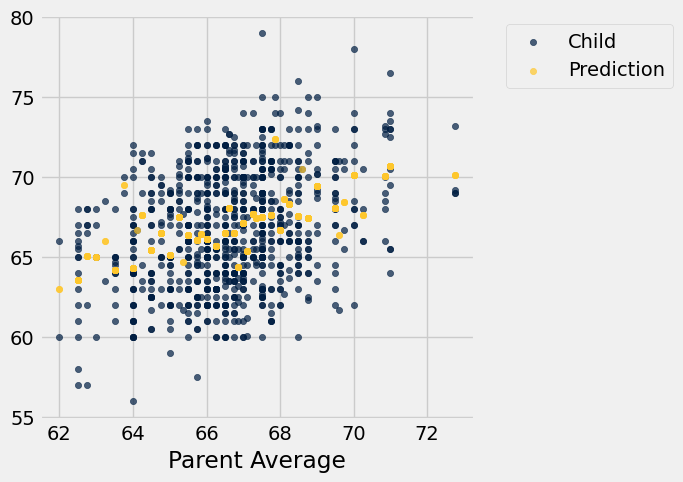

In [16]:
#Visualize Scatterplot of predictions
heights.select('Parent Average', 'Child', 'Prediction').scatter('Parent Average')

## Prediction Accuracy ##

In [17]:
def difference(x, y):
    return x - y

In [18]:
pred_errs = heights.apply(difference, 'Prediction', 'Child')
heights = heights.with_column('errors',pred_errs)
heights

Parent Average,Child,Sex,Prediction,errors
72.75,73.2,male,70.1,-3.1
72.75,69.2,female,70.1,0.9
72.75,69,female,70.1,1.1
72.75,69,female,70.1,1.1
71,73.5,male,70.6818,-2.81818
71,72.5,male,70.6818,-1.81818
71,65.5,female,70.6818,5.18182
71,65.5,female,70.6818,5.18182
69.5,71,male,68.06,-2.94
69.5,68,female,68.06,0.06


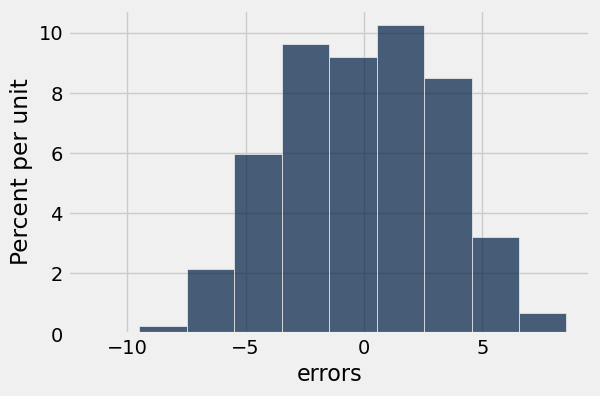

In [19]:
heights.hist('errors')

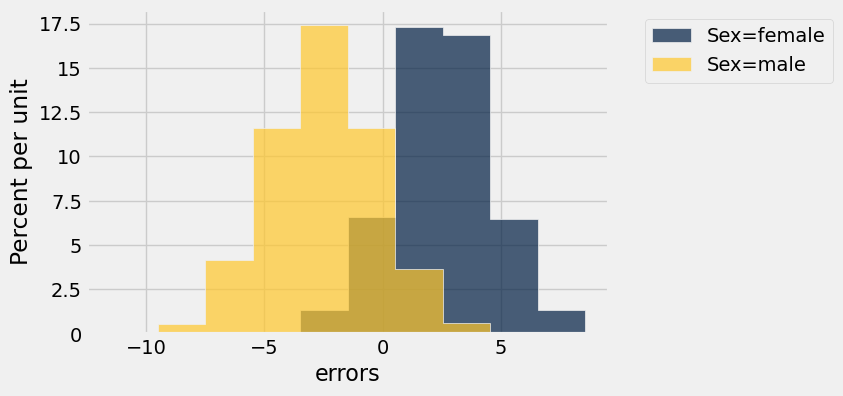

In [20]:
heights.hist('errors', group='Sex')

# Discussion Question

In [21]:
def predict_smarter(h, s):
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    nearby_same_sex = nearby.where("Sex", s)
    return np.average(nearby_same_sex.column("Child"))

In [22]:
predict_smarter(68, 'female')

64.98351648351648

In [23]:
predict_smarter(68, 'male')

70.17234042553191

In [24]:
smarter_predicted_heights = heights.apply(predict_smarter, 'Parent Average', 'Sex')
heights = heights.with_column('Smarter Prediction', smarter_predicted_heights)

In [25]:
smarter_pred_errs = heights.apply(difference, 'Child', 'Smarter Prediction')
heights = heights.with_column('Smarter Errors', smarter_pred_errs)

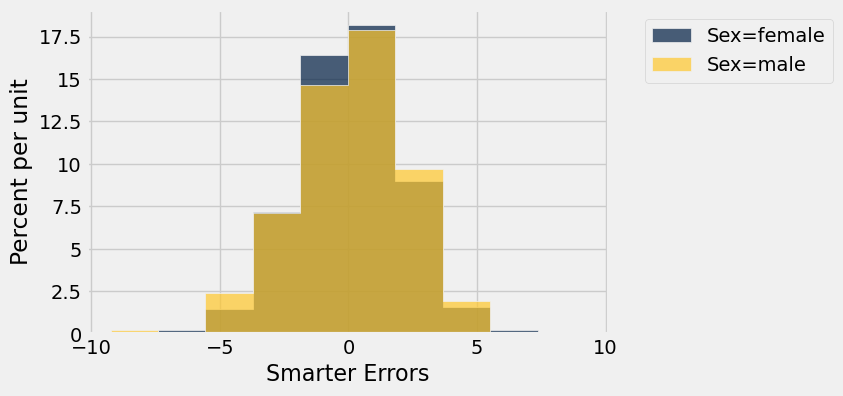

In [26]:
heights.hist('Smarter Errors', group='Sex')

## Grouping by One Column ##

In [27]:
cones = Table.read_table('cones.csv').drop('Color')
cones

Flavor,Price
strawberry,3.55
chocolate,4.75
chocolate,5.25
strawberry,5.25
chocolate,5.25
bubblegum,4.75


In [28]:
cones.group("Flavor")

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


In [29]:
cones.group("Flavor", np.average)

Flavor,Price average
bubblegum,4.75
chocolate,5.08333
strawberry,4.4


In [30]:
cones.group("Flavor", min)

Flavor,Price min
bubblegum,4.75
chocolate,4.75
strawberry,3.55


## Grouping By One Column: Welcome Survey ##

In [31]:
survey = Table.read_table('welcome_survey_su23.csv')
survey.show(3)

Year,Extraversion,Number of Textees,Hours of Sleep,Handedness,Pant Leg,Sleep Position,Pets
Rising second,5,5,9,Right-handed,I don't know,On your right side,None
Rising second,5,5,8,Left-handed,Left leg in first,On your stomach,"Dog, Fish"
Rising fifth or above,7,4,7,Right-handed,Right leg in first,On your stomach,None


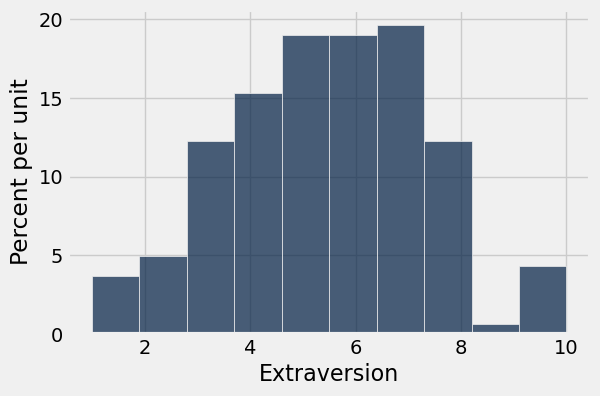

In [32]:
survey.hist('Extraversion')

In [33]:
survey.group("Extraversion")

Extraversion,count
1,6
2,8
3,20
4,25
5,31
6,31
7,32
8,20
9,1
10,7


In [34]:
grouped_survey = survey.group("Extraversion", np.average)

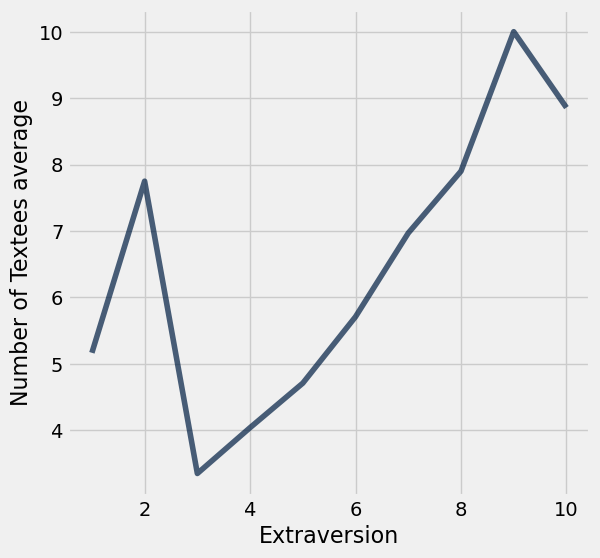

In [ ]:
grouped_survey.plot("Extraversion", "Number of Textees average")

In [ ]:
grouped_survey

Extraversion,Year average,Number of Textees average,Hours of Sleep average,Handedness average,Pant Leg average,Sleep Position average,Pets average
1,,5.16667,7.33333,,,,
2,,7.75,6.625,,,,
3,,3.35,7,,,,
4,,4.04,7.44,,,,
5,,4.70968,6.96774,,,,
6,,5.70968,7.19355,,,,
7,,6.96875,6.84375,,,,
8,,7.9,7.05,,,,
9,,10,6,,,,
10,,8.85714,7.14286,,,,


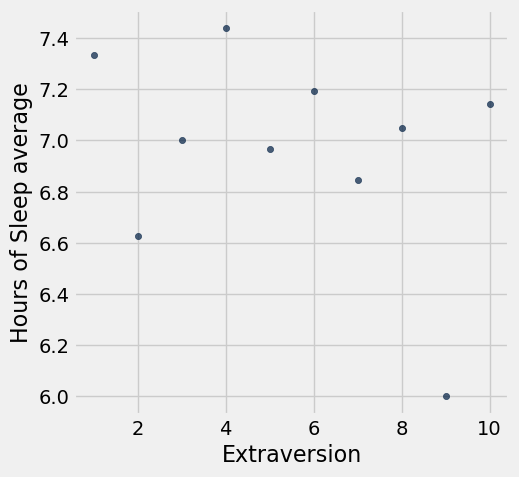

In [49]:
grouped_survey.scatter("Extraversion", "Hours of Sleep average")

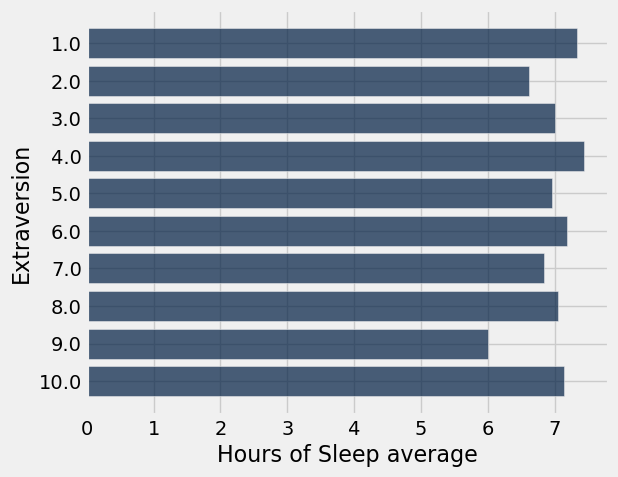

In [36]:
grouped_survey.barh("Extraversion", "Hours of Sleep average")

## Lists

In [37]:
[1, "2", 3, 4]

[1, '2', 3, 4]

In [40]:
t = [1, 'two', Table()]
t

[1, 'two', ]

### Rows from Lists

In [38]:
a = Table().with_columns('Numbers', [1, 2, 3])

In [83]:
drinks = Table(['Drink', 'Cafe', 'Price'])
drinks

Drink,Cafe,Price


In [84]:
drinks = drinks.with_rows([
    ['Milk Tea', 'Asha', 5.5],
    ['Espresso', 'Strada',  1.75],
    ['Latte',    'Strada',  3.25],
    ['Espresso', "FSM",   2]
])
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


## Grouping by Two Columns ##

![Do right-handed people tend to sleep on their left side and left-handed people sleep on their right?](handed.png)

In [60]:
survey.group(["Handedness", "Sleep Position"])

Handedness,Sleep Position,count
Left-handed,On your back,5
Left-handed,On your left side,5
Left-handed,On your right side,4
Left-handed,On your stomach,3
Right-handed,On your back,52
Right-handed,On your left side,43
Right-handed,On your right side,46
Right-handed,On your stomach,23


## Pivot Tables

In [61]:
survey.pivot("Handedness", "Sleep Position")

Sleep Position,Left-handed,Right-handed
On your back,5,52
On your left side,5,43
On your right side,4,46
On your stomach,3,23


In [65]:
survey.pivot("Handedness", "Sleep Position", "Number of Textees", min)

Sleep Position,Left-handed,Right-handed
On your back,2,0
On your left side,2,1
On your right side,2,0
On your stomach,4,1


## Discussion Questions

In [74]:
# From the CORGIS Dataset Project
# By Austin Cory Bart acbart@vt.edu
# Version 2.0.0, created 3/22/2016
# https://corgis-edu.github.io/corgis/csv/skyscrapers/

sky = Table.read_table('skyscrapers.csv')
sky = (sky.with_column('age', 2022 - sky.column('completed'))
          .drop('completed'))
sky.show(3)

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,8
Willis Tower,steel,Chicago,442.14,48
432 Park Avenue,concrete,New York City,425.5,7


In [75]:
# 1. For each city, what’s the tallest building for each material?





In [41]:
# 2. For each city, what’s the height difference between the tallest 
#    steel building and the tallest concrete building?





Don't read ahead until you try the challenge questions yourself first!

In [42]:
sky.select('material', 'city', 'height').group(['city', 'material'], collect=max)

NameError: name 'sky' is not defined

In [93]:
sky_p = sky.pivot('material', 'city', values='height', collect=max)
sky_p.show()

name,material,city,height,age
One World Trade Center,mixed/composite,New York City,541.3,8
Willis Tower,steel,Chicago,442.14,48
432 Park Avenue,concrete,New York City,425.5,7
Trump International Hotel & Tower,concrete,Chicago,423.22,13
Empire State Building,steel,New York City,381,91
Bank of America Tower,mixed/composite,New York City,365.8,13
Stratosphere Tower,concrete,Las Vegas,350.22,26
Aon Center,steel,Chicago,346.26,49
John Hancock Center,steel,Chicago,343.69,53
Chrysler Building,steel,New York City,318.9,92


In [ ]:
sky_p = sky_p.with_column(
    'difference', 
    abs(sky_p.column('steel') - sky_p.column('concrete'))
)
sky_p

In [ ]:
sky_p.sort('difference', True)

In [ ]:
# 3. Generate a table of the names of the oldest buildings for each 
#    material for each city:

# Hint: You can use sort to find the name of the oldest building in the dataset
sky.sort('age', descending=True).column('name').item(0)

In [ ]:
def first(s):
    "Return the first element in an array."
    return s.item(0)

(sky
 .sort('age', descending=True)
 .pivot('material', 'city', 'name', first)
)#.where('city', 'San Francisco')

## Joins

In [85]:
drinks

Drink,Cafe,Price
Milk Tea,Asha,5.5
Espresso,Strada,1.75
Latte,Strada,3.25
Espresso,FSM,2


In [86]:
discounts = Table().with_columns(
    'Coupon % off', make_array(10, 25, 5),
    'Location', make_array('Asha', 'Strada', 'Asha')
)
discounts

Coupon % off,Location
10,Asha
25,Strada
5,Asha


In [87]:
combined = drinks.join('Cafe', discounts, 'Location')
combined

Cafe,Drink,Price,Coupon % off
Asha,Milk Tea,5.5,10
Asha,Milk Tea,5.5,5
Strada,Espresso,1.75,25
Strada,Latte,3.25,25


In [88]:
discounted_frac = 1 - combined.column('Coupon % off') / 100
combined.with_column(
    'Discounted Price', 
    combined.column('Price') * discounted_frac
)

Cafe,Drink,Price,Coupon % off,Discounted Price
Asha,Milk Tea,5.5,10,4.95
Asha,Milk Tea,5.5,5,5.225
Strada,Espresso,1.75,25,1.3125
Strada,Latte,3.25,25,2.4375


In [89]:
drinks.join('Cafe', drinks, 'Cafe')

Cafe,Drink,Price,Drink_2,Price_2
Asha,Milk Tea,5.5,Milk Tea,5.5
FSM,Espresso,2,Espresso,2
Strada,Espresso,1.75,Espresso,1.75
Strada,Espresso,1.75,Latte,3.25
Strada,Latte,3.25,Espresso,1.75
Strada,Latte,3.25,Latte,3.25
